In [438]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

from itertools import cycle
from collections import Counter

In [439]:
#available here: https://www.kaggle.com/rohitrox/medical-provider-fraud-detection

### Various dataframes:

In [440]:
test_provider_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Test.csv', low_memory=False)   
test_bene_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Test_Beneficiarydata.csv', low_memory=False)   
test_inp_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Test_Inpatientdata.csv', low_memory=False)   
test_outp_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Test_Outpatientdata.csv', low_memory=False)   

train_provider_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Train.csv', low_memory=False)   
train_bene_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Train_Beneficiarydata.csv', low_memory=False)   
train_inp_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Train_Inpatientdata.csv', low_memory=False)    
train_outp_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/datasets/Train_Outpatientdata.csv', low_memory=False)    

In [441]:
print("There are %.0f observations in the provider test data." % len(test_provider_data))
test_fraud_data.head()

There are 1353 observations in the provider test data.


,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [442]:
print("There are %.0f observations in the training provider data." % len(train_provider_data))
train_provider_data.head()

There are 5410 observations in the training provider data.


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [443]:
# the test set does not list potential fraud. 
# We will prepare the training set for study.
# Will we separately apply the same steps to the test data. 

In [444]:
train_bene_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [517]:
train_inp_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Duration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2 days
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8 days
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17 days


In [518]:
train_outp_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


### Modifying original dataframes

In [445]:
# to datetime


In [447]:
# to datetime
train_bene_data['DOB'] = pd.to_datetime(train_bene_data['DOB'])

train_inp_data['ClaimStartDt'] = pd.to_datetime(train_inp_data['ClaimStartDt'])
train_inp_data['ClaimEndDt'] = pd.to_datetime(train_inp_data['ClaimEndDt'])
train_inp_data['AdmissionDt'] = pd.to_datetime(train_inp_data['AdmissionDt'])
train_inp_data['DischargeDt'] = pd.to_datetime(train_inp_data['DischargeDt'])

train_outp_data['ClaimStartDt'] = pd.to_datetime(train_outp_data['ClaimStartDt'])
train_outp_data['ClaimEndDt'] = pd.to_datetime(train_outp_data['ClaimEndDt'])

# new column
train_inp_data['Duration'] = train_inp_data.DischargeDt - train_inp_data.AdmissionDt

### Merging dataframes:

In [450]:
print("These columns are only applicable to inpatient claims:")
for col in train_inp_data.columns:
    if col not in train_outp_data.columns:
        print("-", col)

These columns are only applicable to inpatient claims:
- AdmissionDt
- DischargeDt
- DiagnosisGroupCode
- Duration


In [451]:
col_list = [col for col in train_outp_data.columns]
train_all_claims = train_outp_data.merge(train_inp_data, how = 'outer', on = col_list)

In [452]:
train_claims_bene_df = train_all_claims.merge(train_bene_data, how = 'inner', on = 'BeneID')

In [453]:
train_claims_bene_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,Duration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaT,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaT,NaT,NaN,NaT,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaT,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaT,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaT,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760


In [454]:
# creating Death column as binary variable
train_claims_bene_df['DOD'] = train_claims_bene_df['DOD'].astype('str')
train_claims_bene_df['DOD'].fillna(0)

death = []
for i, row in train_claims_bene_df.iterrows():
    if train_claims_bene_df['DOD'][i] == 'nan':
        death.append(0)
    else:
        death.append(1)
train_claims_bene_df['Death'] = death

In [455]:
# Creating age column. 
train_claims_bene_df['DOD'] = pd.to_datetime(train_bene_data['DOD'])
train_claims_bene_df['Age'] = round(((train_claims_bene_df['DOD'] - train_claims_bene_df['DOB']).dt.days)/365)
train_claims_bene_df['Age'] = train_claims_bene_df['Age'].fillna(round(((train_claims_bene_df['DOD'].max() - train_claims_bene_df['DOB']).dt.days)/365))  

In [456]:
#making gender binary variable:
train_claims_bene_df['Gender'] = train_claims_bene_df['Gender'] - 1

In [457]:
# converting RenalDiseaseIndicator to numeric type:
rd_indicator = []
for i, row in train_claims_bene_df.iterrows():
    if train_claims_bene_df['RenalDiseaseIndicator'][i] == 'Y':
        rd_indicator.append(1)
    else:
        rd_indicator.append(0)
train_claims_bene_df['RenalDiseaseIndicator'] = rd_indicator

train_claims_bene_df['RenalDiseaseIndicator'] = train_claims_bene_df['RenalDiseaseIndicator'].astype('int64')

In [458]:
train_claims_bene_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,Duration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Death,Age
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaT,1936-09-01,NaT,1,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,0,73.0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaT,NaT,NaN,NaT,1936-08-01,NaT,0,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,0,73.0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaT,1936-08-01,NaT,0,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,0,73.0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaT,1922-07-01,NaT,0,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,0,87.0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaT,1922-07-01,NaT,0,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,0,87.0


### Aggregating data to provider level:

In [459]:
# check values for each in dataframe 
for col in train_claims_bene_df.columns:
    print(col, len(train_claims_bene_df[col].unique()))

BeneID 138556
ClaimID 558211
ClaimStartDt 398
ClaimEndDt 366
Provider 5410
InscClaimAmtReimbursed 438
AttendingPhysician 82064
OperatingPhysician 35316
OtherPhysician 46458
ClmDiagnosisCode_1 10451
ClmDiagnosisCode_2 5301
ClmDiagnosisCode_3 4757
ClmDiagnosisCode_4 4360
ClmDiagnosisCode_5 3971
ClmDiagnosisCode_6 3608
ClmDiagnosisCode_7 3389
ClmDiagnosisCode_8 3071
ClmDiagnosisCode_9 2775
ClmDiagnosisCode_10 1159
ClmProcedureCode_1 1118
ClmProcedureCode_2 301
ClmProcedureCode_3 155
ClmProcedureCode_4 49
ClmProcedureCode_5 7
ClmProcedureCode_6 1
DeductibleAmtPaid 18
ClmAdmitDiagnosisCode 4099
AdmissionDt 399
DischargeDt 366
DiagnosisGroupCode 737
Duration 37
DOB 900
DOD 12
Gender 2
Race 4
RenalDiseaseIndicator 2
State 52
County 314
NoOfMonths_PartACov 13
NoOfMonths_PartBCov 13
ChronicCond_Alzheimer 2
ChronicCond_Heartfailure 2
ChronicCond_KidneyDisease 2
ChronicCond_Cancer 2
ChronicCond_ObstrPulmonary 2
ChronicCond_Depression 2
ChronicCond_Diabetes 2
ChronicCond_IschemicHeart 2
ChronicCon

In [460]:
# we will not use claim procedure code 5 or 6 for aggregation:
print(train_claims_bene_df['ClmProcedureCode_5'].value_counts())
print(train_claims_bene_df['ClmProcedureCode_6'].value_counts())

4139.0    3
2724.0    2
5185.0    1
4422.0    1
9982.0    1
9971.0    1
Name: ClmProcedureCode_5, dtype: int64
Series([], Name: ClmProcedureCode_6, dtype: int64)


In [486]:
#durations to numeric
durations = []
train_claims_bene_df['Duration'] = train_claims_bene_df['Duration'].astype('str')

for duration in train_claims_bene_df['Duration']:
    if duration == 'NaT':
        durations.append([0])
    else:
        durations.append([int(s) for s in duration.split() if s.isdigit()])
    
durations = [val for sublist in durations for val in sublist]
train_claims_bene_df['Duration'] = durations

#### Aggregating beneficiary data: 
*  Patients seen more frequently by a provider will be weighted more heavily in aggregation.

In [597]:
train_final_df = train_provider_data.copy()

col_list = ['Age', 'Death', 'Gender', 'Duration', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', \
        'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', \
        'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', \
        'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', \
        'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

for column_name in col_list:
    variable = (train_claims_bene_df.groupby(['Provider'])[column_name].mean())
    train_final_df = pd.merge(variable.to_frame(), train_final_df, left_index=True, right_on='Provider')
    
max_one_race = train_claims_bene_df.groupby(['Provider', 'Race'])['Race'].count().groupby('Provider').max()
all_people = train_claims_bene_df.groupby(['Provider', 'Race'])['Race'].count().groupby('Provider').sum()
race_ratio = max_one_race / all_people
train_final_df = pd.merge(race_ratio.to_frame('Max_race_perc'), train_final_df, left_index=True, right_on='Provider')

max_races = train_claims_bene_df.groupby(['Provider', 'Race'])['Race'].count().groupby('Provider').idxmax()
max_races = [x[1] for x in max_races]
train_final_df['Race'] = max_races

In [598]:
train_final_df.head()

,Max_race_perc,ChronicCond_stroke,ChronicCond_rheumatoidarthritis,ChronicCond_Osteoporasis,ChronicCond_IschemicHeart,ChronicCond_Diabetes,ChronicCond_Depression,ChronicCond_ObstrPulmonary,ChronicCond_Cancer,ChronicCond_KidneyDisease,ChronicCond_Heartfailure,ChronicCond_Alzheimer,NoOfMonths_PartBCov,NoOfMonths_PartACov,RenalDiseaseIndicator,Duration,Gender,Death,Age,Provider,PotentialFraud,Race
0,0.840000,1.760000,1.680000,1.760000,1.080000,1.160000,1.640000,1.600000,1.800000,1.320000,1.240000,1.400000,12.000000,12.000000,0.320000,1.000000,0.640000,0.000000,78.840000,PRV51001,No,1
1,0.810606,1.909091,1.712121,1.750000,1.151515,1.242424,1.590909,1.689394,1.924242,1.515152,1.393939,1.575758,11.871212,11.818182,0.219697,2.424242,0.590909,0.007576,70.022727,PRV51003,Yes,1
2,0.805369,1.885906,1.691275,1.671141,1.275168,1.295302,1.577181,1.724832,1.892617,1.664430,1.409396,1.570470,11.959732,11.865772,0.154362,0.000000,0.691275,0.006711,72.161074,PRV51004,No,1
3,0.766524,1.893562,1.715880,1.704721,1.231760,1.314163,1.583691,1.746781,1.858369,1.564807,1.416309,1.634335,11.939914,11.907296,0.222318,0.000000,0.561373,0.003433,70.475536,PRV51005,Yes,1
4,0.805556,1.833333,1.694444,1.708333,1.291667,1.319444,1.597222,1.777778,1.833333,1.694444,1.444444,1.638889,11.833333,11.833333,0.152778,0.222222,0.527778,0.013889,69.305556,PRV51007,No,1


#### Aggregating claims data through costs:
* Cost aggregations change when grouped by different variables: 
  * beneficiary
  * duration 
  * deductible paid 
  * physician
  * claim code

In [599]:
costs = ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

grouping_list = ['BeneID', 'Duration', 'DeductibleAmtPaid', 'DiagnosisGroupCode', \
                 'OtherPhysician', 'OperatingPhysician', 'AttendingPhysician', \
                 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmAdmitDiagnosisCode', \
                 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', \
                 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', \
                 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', \
                 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4']

tuple_list = []
 
for grouper in grouping_list:
    for cost in costs:
        tuple_list.append((grouper, cost))
        
for grouper, cost in tuple_list: 
    variable = (train_claims_bene_df.groupby(['Provider', grouper])[cost].mean()).groupby(['Provider']).mean()
    train_final_df = pd.merge(variable.to_frame((cost, grouper)), train_final_df, left_index=True, right_on='Provider')

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on t

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on t

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on t

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on t

In [601]:
# adjusting column names
new_cols = []

for col in train_final_df.columns:
    if type(col) is tuple:
        new_name = ('_'.join(col))
        new_cols.append(new_name)
    else:
        new_cols.append(col)

train_final_df.columns = new_cols

## Final dataframe for modeling

In [602]:
train_final_df.head()

,OPAnnualDeductibleAmt_ClmProcedureCode_4,OPAnnualReimbursementAmt_ClmProcedureCode_4,IPAnnualDeductibleAmt_ClmProcedureCode_4,IPAnnualReimbursementAmt_ClmProcedureCode_4,InscClaimAmtReimbursed_ClmProcedureCode_4,OPAnnualDeductibleAmt_ClmProcedureCode_3,OPAnnualReimbursementAmt_ClmProcedureCode_3,IPAnnualDeductibleAmt_ClmProcedureCode_3,IPAnnualReimbursementAmt_ClmProcedureCode_3,InscClaimAmtReimbursed_ClmProcedureCode_3,OPAnnualDeductibleAmt_ClmProcedureCode_2,OPAnnualReimbursementAmt_ClmProcedureCode_2,IPAnnualDeductibleAmt_ClmProcedureCode_2,IPAnnualReimbursementAmt_ClmProcedureCode_2,InscClaimAmtReimbursed_ClmProcedureCode_2,OPAnnualDeductibleAmt_ClmProcedureCode_1,OPAnnualReimbursementAmt_ClmProcedureCode_1,IPAnnualDeductibleAmt_ClmProcedureCode_1,IPAnnualReimbursementAmt_ClmProcedureCode_1,InscClaimAmtReimbursed_ClmProcedureCode_1,OPAnnualDeductibleAmt_ClmDiagnosisCode_10,OPAnnualReimbursementAmt_ClmDiagnosisCode_10,IPAnnualDeductibleAmt_ClmDiagnosisCode_10,IPAnnualReimbursementAmt_ClmDiagnosisCode_10,InscClaimAmtReimbursed_ClmDiagnosisCode_10,OPAnnualDeductibleAmt_ClmDiagnosisCode_9,OPAnnualReimbursementAmt_ClmDiagnosisCode_9,IPAnnualDeductibleAmt_ClmDiagnosisCode_9,IPAnnualReimbursementAmt_ClmDiagnosisCode_9,InscClaimAmtReimbursed_ClmDiagnosisCode_9,OPAnnualDeductibleAmt_ClmDiagnosisCode_8,OPAnnualReimbursementAmt_ClmDiagnosisCode_8,IPAnnualDeductibleAmt_ClmDiagnosisCode_8,IPAnnualReimbursementAmt_ClmDiagnosisCode_8,InscClaimAmtReimbursed_ClmDiagnosisCode_8,OPAnnualDeductibleAmt_ClmDiagnosisCode_7,OPAnnualReimbursementAmt_ClmDiagnosisCode_7,IPAnnualDeductibleAmt_ClmDiagnosisCode_7,IPAnnualReimbursementAmt_ClmDiagnosisCode_7,InscClaimAmtReimbursed_ClmDiagnosisCode_7,OPAnnualDeductibleAmt_ClmDiagnosisCode_6,OPAnnualReimbursementAmt_ClmDiagnosisCode_6,IPAnnualDeductibleAmt_ClmDiagnosisCode_6,IPAnnualReimbursementAmt_ClmDiagnosisCode_6,InscClaimAmtReimbursed_ClmDiagnosisCode_6,OPAnnualDeductibleAmt_ClmDiagnosisCode_5,OPAnnualReimbursementAmt_ClmDiagnosisCode_5,IPAnnualDeductibleAmt_ClmDiagnosisCode_5,IPAnnualReimbursementAmt_ClmDiagnosisCode_5,InscClaimAmtReimbursed_ClmDiagnosisCode_5,OPAnnualDeductibleAmt_ClmDiagnosisCode_4,OPAnnualReimbursementAmt_ClmDiagnosisCode_4,IPAnnualDeductibleAmt_ClmDiagnosisCode_4,IPAnnualReimbursementAmt_ClmDiagnosisCode_4,InscClaimAmtReimbursed_ClmDiagnosisCode_4,OPAnnualDeductibleAmt_ClmDiagnosisCode_3,OPAnnualReimbursementAmt_ClmDiagnosisCode_3,IPAnnualDeductibleAmt_ClmDiagnosisCode_3,IPAnnualReimbursementAmt_ClmDiagnosisCode_3,InscClaimAmtReimbursed_ClmDiagnosisCode_3,OPAnnualDeductibleAmt_ClmAdmitDiagnosisCode,OPAnnualReimbursementAmt_ClmAdmitDiagnosisCode,IPAnnualDeductibleAmt_ClmAdmitDiagnosisCode,IPAnnualReimbursementAmt_ClmAdmitDiagnosisCode,InscClaimAmtReimbursed_ClmAdmitDiagnosisCode,OPAnnualDeductibleAmt_ClmDiagnosisCode_2,OPAnnualReimbursementAmt_ClmDiagnosisCode_2,IPAnnualDeductibleAmt_ClmDiagnosisCode_2,IPAnnualReimbursementAmt_ClmDiagnosisCode_2,InscClaimAmtReimbursed_ClmDiagnosisCode_2,OPAnnualDeductibleAmt_ClmDiagnosisCode_1,OPAnnualReimbursementAmt_ClmDiagnosisCode_1,IPAnnualDeductibleAmt_ClmDiagnosisCode_1,IPAnnualReimbursementAmt_ClmDiagnosisCode_1,InscClaimAmtReimbursed_ClmDiagnosisCode_1,OPAnnualDeductibleAmt_AttendingPhysician,OPAnnualReimbursementAmt_AttendingPhysician,IPAnnualDeductibleAmt_AttendingPhysician,IPAnnualReimbursementAmt_AttendingPhysician,InscClaimAmtReimbursed_AttendingPhysician,OPAnnualDeductibleAmt_OperatingPhysician,OPAnnualReimbursementAmt_OperatingPhysician,IPAnnualDeductibleAmt_OperatingPhysician,IPAnnualReimbursementAmt_OperatingPhysician,InscClaimAmtReimbursed_OperatingPhysician,OPAnnualDeductibleAmt_OtherPhysician,OPAnnualReimbursementAmt_OtherPhysician,IPAnnualDeductibleAmt_OtherPhysician,IPAnnualReimbursementAmt_OtherPhysician,InscClaimAmtReimbursed_OtherPhysician,OPAnnualDeductibleAmt_DiagnosisGroupCode,OPAnnualReimbursementAmt_DiagnosisGroupCode,IPAnnualDeductibleAmt_DiagnosisGroupCode,IPAnnualReimbursementAmt_DiagnosisGroupCode,InscClaimAmtR

In [595]:
train_final_df[train_final_df.isna().any(axis=1)]

,OPAnnualDeductibleAmt_ClmProcedureCode_4,OPAnnualReimbursementAmt_ClmProcedureCode_4,IPAnnualDeductibleAmt_ClmProcedureCode_4,IPAnnualReimbursementAmt_ClmProcedureCode_4,InscClaimAmtReimbursed_ClmProcedureCode_4,OPAnnualDeductibleAmt_ClmProcedureCode_3,OPAnnualReimbursementAmt_ClmProcedureCode_3,IPAnnualDeductibleAmt_ClmProcedureCode_3,IPAnnualReimbursementAmt_ClmProcedureCode_3,InscClaimAmtReimbursed_ClmProcedureCode_3,OPAnnualDeductibleAmt_ClmProcedureCode_2,OPAnnualReimbursementAmt_ClmProcedureCode_2,IPAnnualDeductibleAmt_ClmProcedureCode_2,IPAnnualReimbursementAmt_ClmProcedureCode_2,InscClaimAmtReimbursed_ClmProcedureCode_2,OPAnnualDeductibleAmt_ClmProcedureCode_1,OPAnnualReimbursementAmt_ClmProcedureCode_1,IPAnnualDeductibleAmt_ClmProcedureCode_1,IPAnnualReimbursementAmt_ClmProcedureCode_1,InscClaimAmtReimbursed_ClmProcedureCode_1,OPAnnualDeductibleAmt_ClmDiagnosisCode_10,OPAnnualReimbursementAmt_ClmDiagnosisCode_10,IPAnnualDeductibleAmt_ClmDiagnosisCode_10,IPAnnualReimbursementAmt_ClmDiagnosisCode_10,InscClaimAmtReimbursed_ClmDiagnosisCode_10,OPAnnualDeductibleAmt_ClmDiagnosisCode_9,OPAnnualReimbursementAmt_ClmDiagnosisCode_9,IPAnnualDeductibleAmt_ClmDiagnosisCode_9,IPAnnualReimbursementAmt_ClmDiagnosisCode_9,InscClaimAmtReimbursed_ClmDiagnosisCode_9,OPAnnualDeductibleAmt_ClmDiagnosisCode_8,OPAnnualReimbursementAmt_ClmDiagnosisCode_8,IPAnnualDeductibleAmt_ClmDiagnosisCode_8,IPAnnualReimbursementAmt_ClmDiagnosisCode_8,InscClaimAmtReimbursed_ClmDiagnosisCode_8,OPAnnualDeductibleAmt_ClmDiagnosisCode_7,OPAnnualReimbursementAmt_ClmDiagnosisCode_7,IPAnnualDeductibleAmt_ClmDiagnosisCode_7,IPAnnualReimbursementAmt_ClmDiagnosisCode_7,InscClaimAmtReimbursed_ClmDiagnosisCode_7,OPAnnualDeductibleAmt_ClmDiagnosisCode_6,OPAnnualReimbursementAmt_ClmDiagnosisCode_6,IPAnnualDeductibleAmt_ClmDiagnosisCode_6,IPAnnualReimbursementAmt_ClmDiagnosisCode_6,InscClaimAmtReimbursed_ClmDiagnosisCode_6,OPAnnualDeductibleAmt_ClmDiagnosisCode_5,OPAnnualReimbursementAmt_ClmDiagnosisCode_5,IPAnnualDeductibleAmt_ClmDiagnosisCode_5,IPAnnualReimbursementAmt_ClmDiagnosisCode_5,InscClaimAmtReimbursed_ClmDiagnosisCode_5,OPAnnualDeductibleAmt_ClmDiagnosisCode_4,OPAnnualReimbursementAmt_ClmDiagnosisCode_4,IPAnnualDeductibleAmt_ClmDiagnosisCode_4,IPAnnualReimbursementAmt_ClmDiagnosisCode_4,InscClaimAmtReimbursed_ClmDiagnosisCode_4,OPAnnualDeductibleAmt_ClmDiagnosisCode_3,OPAnnualReimbursementAmt_ClmDiagnosisCode_3,IPAnnualDeductibleAmt_ClmDiagnosisCode_3,IPAnnualReimbursementAmt_ClmDiagnosisCode_3,InscClaimAmtReimbursed_ClmDiagnosisCode_3,OPAnnualDeductibleAmt_ClmAdmitDiagnosisCode,OPAnnualReimbursementAmt_ClmAdmitDiagnosisCode,IPAnnualDeductibleAmt_ClmAdmitDiagnosisCode,IPAnnualReimbursementAmt_ClmAdmitDiagnosisCode,InscClaimAmtReimbursed_ClmAdmitDiagnosisCode,OPAnnualDeductibleAmt_ClmDiagnosisCode_2,OPAnnualReimbursementAmt_ClmDiagnosisCode_2,IPAnnualDeductibleAmt_ClmDiagnosisCode_2,IPAnnualReimbursementAmt_ClmDiagnosisCode_2,InscClaimAmtReimbursed_ClmDiagnosisCode_2,OPAnnualDeductibleAmt_ClmDiagnosisCode_1,OPAnnualReimbursementAmt_ClmDiagnosisCode_1,IPAnnualDeductibleAmt_ClmDiagnosisCode_1,IPAnnualReimbursementAmt_ClmDiagnosisCode_1,InscClaimAmtReimbursed_ClmDiagnosisCode_1,OPAnnualDeductibleAmt_AttendingPhysician,OPAnnualReimbursementAmt_AttendingPhysician,IPAnnualDeductibleAmt_AttendingPhysician,IPAnnualReimbursementAmt_AttendingPhysician,InscClaimAmtReimbursed_AttendingPhysician,OPAnnualDeductibleAmt_OperatingPhysician,OPAnnualReimbursementAmt_OperatingPhysician,IPAnnualDeductibleAmt_OperatingPhysician,IPAnnualReimbursementAmt_OperatingPhysician,InscClaimAmtReimbursed_OperatingPhysician,OPAnnualDeductibleAmt_OtherPhysician,OPAnnualReimbursementAmt_OtherPhysician,IPAnnualDeductibleAmt_OtherPhysician,IPAnnualReimbursementAmt_OtherPhysician,InscClaimAmtReimbursed_OtherPhysician,OPAnnualDeductibleAmt_DiagnosisGroupCode,OPAnnualReimbursementAmt_DiagnosisGroupCode,IPAnnualDeductibleAmt_DiagnosisGroupCode,IPAnnualReimbursementAmt_DiagnosisGroupCode,InscClaimAmtR

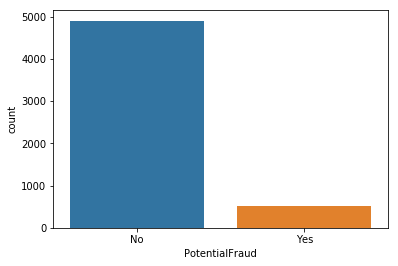

In [596]:
frauds = train_provider_data.PotentialFraud
sns.countplot(frauds)